In [1]:
# This cell is needed if running from source directory without installing TinyQsim\n"
import sys, os
sys.path.append(os.path.abspath('..'))

## Gate Symbols

This example provides a quick overview of the gates available in TinyQsim and their circuit symbols. For information on the function of the gates please see the TinyQsim Gates guide in the 'doc' directory.

In [2]:
PI = '\u03C0'  # PI unicode
from math import pi, acos
from cmath import exp
import numpy as np
from tinyqsim.qcircuit import QCircuit

### Simple One-Qubit Gates

Many gates have a plain square box symbol with one or two letters indicating the type of gate.
For example:

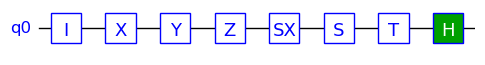

In [3]:
qc = QCircuit(1)
qc.i(0)  # Identity (aka ID)
qc.x(0)  # Pauli X (aka NOT)
qc.y(0)  # Pauli Y
qc.z(0)  # Pauli Z
qc.sx(0) # sqrt(X) (aka SQRTX)
qc.s(0)  # pi/2 radians phase
qc.t(0)  # pi/4 radians phase
qc.h(0)  # Hadamard
qc.draw()

### SWAP Gate

The SWAP gate swaps two qubits. This is a symmetrical operation, which is apparent from the symmetrical symbol:

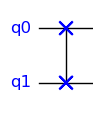

In [4]:
qc = QCircuit(2)
qc.swap(0, 1)  # SWAP
qc.draw()

### Controlled Gates

A controlled gate is drawn with a dot to indicate the control qubit.

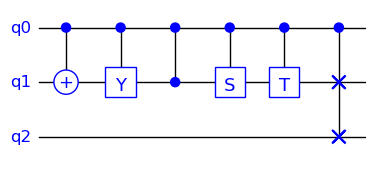

In [5]:
qc = QCircuit(3)
qc.cx(0, 1)   # Controlled-X
qc.cy(0, 1)   # Controlled-Y
qc.cz(0, 1)   # Controlled-Z
qc.cs(0, 1)   # Controlled-S
qc.ct(0, 1)   # Controlled-T
qc.cswap(0,1, 2) # Controlled SWAP
qc.draw()

Note the following:
- Many controlled gates just use the box symbol of the uncontrolled gate, with a control added.
- The CX, CZ and CSWAP gates have special symbols.
- A controlled gate, such at CT, is just labelled 'T'
- The symbol of the CZ gate shows that it is symmetrical even though one qubit is designated as the control.

Gates can also have multiple controls, such as CCX:

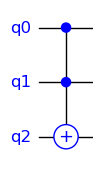

In [6]:
qc = QCircuit(3)
qc.ccx(0,1,2)
qc.draw()

### Parameterized Gates

While many gates perform a fixed operation, there are also parameterized gates that take user-supplied parameters. The following parametrized gates are currently implemented:

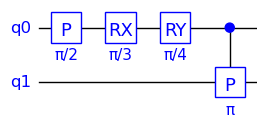

In [7]:
qc = QCircuit(2)
qc.p(pi / 2, f'{PI}/2', 0)   # Phase rotation about Z axis
qc.rx(pi / 3, f'{PI}/3', 0)  # Rotation about X axis
qc.ry(pi / 4, f'{PI}/4', 0)  # Rotation about Y axis
qc.cp(pi, f'{PI}', 0, 1)     # Controlled-P
qc.draw()

### Custom Gates

Custom gates can be created from user-supplied unitary matrices, such as 'u1 and u2' in the following example:

In [8]:
u1 = np.array([[0,1],[1,0]])

u2 = np.array([[1, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 0], [0, 0, 0, 1]])

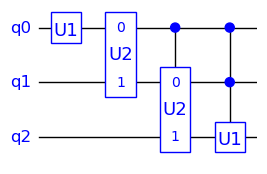

In [9]:
qc = QCircuit(3)
qc.u(u1, 'U1', 0)         # Custom 1-qubit unitary
qc.u(u2, 'U2', 0, 1)      # Custom 2-qubit unitary
qc.cu(u2, 'U2', 0, 1, 2)  # Custom controlled 2-qubit unitary
qc.ccu(u1, 'U1', 0, 1, 2) # Custom controlled-controlled 1-qubit unitary
qc.draw()

Note the following:
- The unitary matrix implements the U function without the controls.
- The function may have multiple arguments.

### Parameterized Custom Gates

Custom gates may also have parameters. This is achieved by defining a function that takes the parameters as arguments and returns a unitary matrix.

For example:

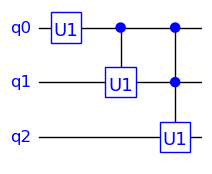

In [10]:
def u(phi):
    # phi is phase angle in radians
    return np.array([[1, 0], [0, exp(1j * phi)]])

qc = QCircuit(3)
qc.u(u(pi/4), 'U1', 0)         # Custom unitary
qc.cu(u(pi/4), 'U1', 0, 1)     # Custom controlled unitary
qc.ccu(u(pi/4), 'U1', 0, 1, 2) # Custom controlled-controlled unitary
qc.draw()

### Assigning Qubits

Gates are assigned to particular qubits by supplying the qubit numbers as arguments. Control qubits always occur first in the list. For example, cx(0,1) has q0 as the control qubit and q1 as the target qubit.

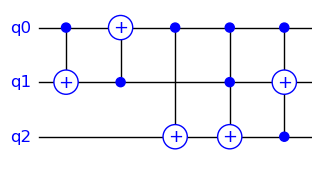

In [11]:
qc = QCircuit(3)
qc.cx(0,1)
qc.cx(1,0)
qc.cx(0,2)
qc.ccx(0,1,2)
qc.ccx(0,2,1)
qc.draw()

Note the following:
- The 1st CX gate is applied to q0 and q1 with q0 as the control.
- The 2nd CX has q1 as control as it is the first argument.
- The 3rd CX gate crosses over q1 because q1 is not involved.
- The 4th gate is a CCX gate with 2 controls.
- The 5th gate is a CCX with the controls on q0 and q2.

### More Complex Cases

More complicated scenarios can arise with custom gates. The following example shows a custom gate made from a 2-qubit unitary, with 2 controls attached:

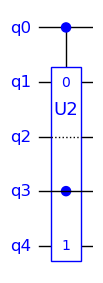

In [12]:
qc = QCircuit(5)
qc.ccu(u2, 'U2', 0, 3, 1, 4)
qc.draw()

Note the following:
- The dotted line on qubit q2 indicates that it just passes through without playing a role.

- The first two arguments (0, 3) of the call are the control qubits, which are indicated by a dot. 
  The control qubits may be inside or outside the box as shown here.

- The numbers (0, 1) in the symbol indicate that these are arguments 0 and 1 for the unitary U (excluding controls).
  In the example, these are connected to qubits q1 and q4.

### Measurement

Measurement 'gates' are not quantum gates in the normal sense as they are not unitary operators. Their circuit is a small meter. This example also shows the barrier symbol, which may be added to a circuit to break it into sections.

Measured qubits[0, 2] -> [0 0]


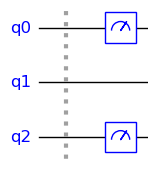

In [13]:
qc = QCircuit(3)
qc.barrier()
qc.measure([0,2])
qc.draw()

For further information, see the TinyQsim Gates Guide in the 'doc' directory.